#Week 04

Classification With KNN(K Nearest Neighbours)

KKN is a Machine Learning Model that can be use to predict based on nearest Characteristic with some nearest neighbours

Prediction that can be implement on classification or regression tasks.

Refrence:https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Sample Dataset

In [3]:
import pandas as pd

sensus = {
     'height': [158, 170, 183, 191, 155, 163, 180, 158, 178],
     'weight': [64, 86, 84, 80, 49, 59, 67, 54, 67],
     'gender': [
          'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female'
     ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,height,weight,gender
0,158,64,male
1,170,86,male
2,183,84,male
3,191,80,male
4,155,49,female
5,163,59,female
6,180,67,female
7,158,54,female
8,178,67,female


Visualization Data

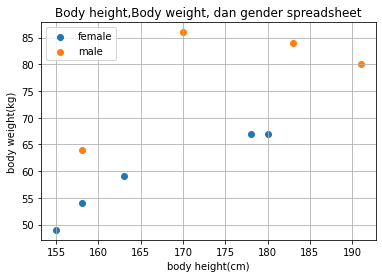

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('gender'):
    ax.scatter(d['height'], d['weight'], label=jk)
    
plt.legend(loc='upper left')
plt.title('Body height,Body weight, dan gender spreadsheet')
plt.xlabel('body height(cm)')
plt.ylabel('body weight(kg)')
plt.grid(True)
plt.show()

Classification with KNN

Preprocessing Dataset

In [4]:
import numpy as np

X_train = np.array(sensus_df[['height', 'weight']])
y_train = np.array(sensus_df ['gender'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['male' 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'female']


In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [6]:
y_train - y_train.flatten()
print(f'y_train: {y_train}')

y_train: [[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


Training KNN Classifaction Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Gender Prediction

In [11]:
body_height = 155
body_weight = 70
X_new = np.array([body_height, body_weight]).reshape(1, -1)
X_new

array([[155,  70]])

In [12]:
y_new = model.predict(X_new)
y_new

array([0])

In [14]:
lb.inverse_transform(y_new)

array(['female'], dtype='<U6')

Visualization Nearest Neighbours

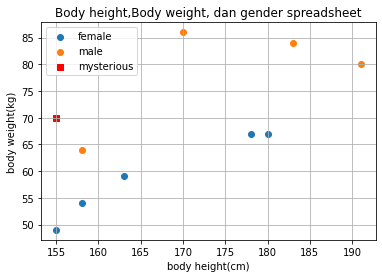

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('gender'):
    ax.scatter(d['height'], d['weight'], label=jk)
    
plt.scatter (body_height,
             body_weight,
             marker= 's',
             color='red',
             label='mysterious')

plt.legend(loc='upper left')
plt.title('Body height,Body weight, dan gender spreadsheet')
plt.xlabel('body height(cm)')
plt.ylabel('body weight(kg)')
plt.grid(True)
plt.show()

Distance Caculation(Euclidean Distance)

Refrence:https://en.wikipedia.org/wiki/Euclidean_distance

In [17]:
mysterious = np.array([body_height, body_weight])
mysterious

array([155,  70])

In [18]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [19]:
from scipy.spatial.distance import euclidean
distance_data = [euclidean(mysterious, d) for d in X_train]
distance_data

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [21]:
sensus_df['distance'] = distance_data
sensus_df.sort_values (['distance'])

,height,weight,gender,distance
0,158,64,male,6.708204
5,163,59,female,13.601471
7,158,54,female,16.278821
4,155,49,female,21.000000
1,170,86,male,21.931712
8,178,67,female,23.194827
6,180,67,female,25.179357
2,183,84,male,31.304952
3,191,80,male,37.363083


Evaluation KNN Classification Model

Testing Set

In [22]:
X_test = np.array([[168,65], [180,96], [160,52], [169,67]])
y_test = lb.transform(np.array(['male','male','female','female'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')


X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[1 1 0 0]


Prediction to the testing set

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0])

Accuracy 
Accuracy is the proportion of test instances that were classified correctly.

Refrence:https://en.wikipedia.org/wiki/Precision_and_recall

In [24]:
from sklearn.metrics import accuracy_score

acc= accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


Precission

Precission is the proportion of test instances that were predicted to be positive that are truly positive.

Refrence:https://en.wikipedia.org/wiki/Precision_and_recall

In [27]:
from sklearn.metrics import precision_score

prec= precision_score(y_test, y_pred)

print(f'Precision: {prec}')

Precision: 1.0


Recall

Recall is the proportion of truly positive test instances that were predicted to be positive.

Refrence:https://en.wikipedia.org/wiki/Precision_and_recall

In [28]:
from sklearn.metrics import recall_score

rec= recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.5


F1 Score

The F1 score is the harmonic mean of precision and recall.

refrence:https://en.wikipedia.org/wiki/Precision_and_recall

In [29]:
from sklearn.metrics import f1_score

f1= f1_score(y_test, y_pred)

print(f'f1-score: {f1}')

f1-score: 0.6666666666666666


Classification Report

In [31]:
from sklearn.metrics import classification_report

cls_report= classification_report(y_test, y_pred)

print(f'classification_report:\n {cls_report}')

classification_report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Matthews Correlation Coefficient (MCC)

MCC is an alternative to the F1 score for measuring the performance of binary classifiers.
A perfect classifier's MCC is 1.
A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1.

refrence:https://en.wikipedia.org/wiki/Matthews_correlation_coefficient

In [33]:
from sklearn.metrics import matthews_corrcoef

mcc= matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
